# Represent

(7659, 124)
(852, 124)
8511
(6808, 124)
(1703, 124)
8511
(5957, 124)
(2554, 124)
8511
(5106, 124)
(3405, 124)
8511
(4255, 124)
(4256, 124)
8511


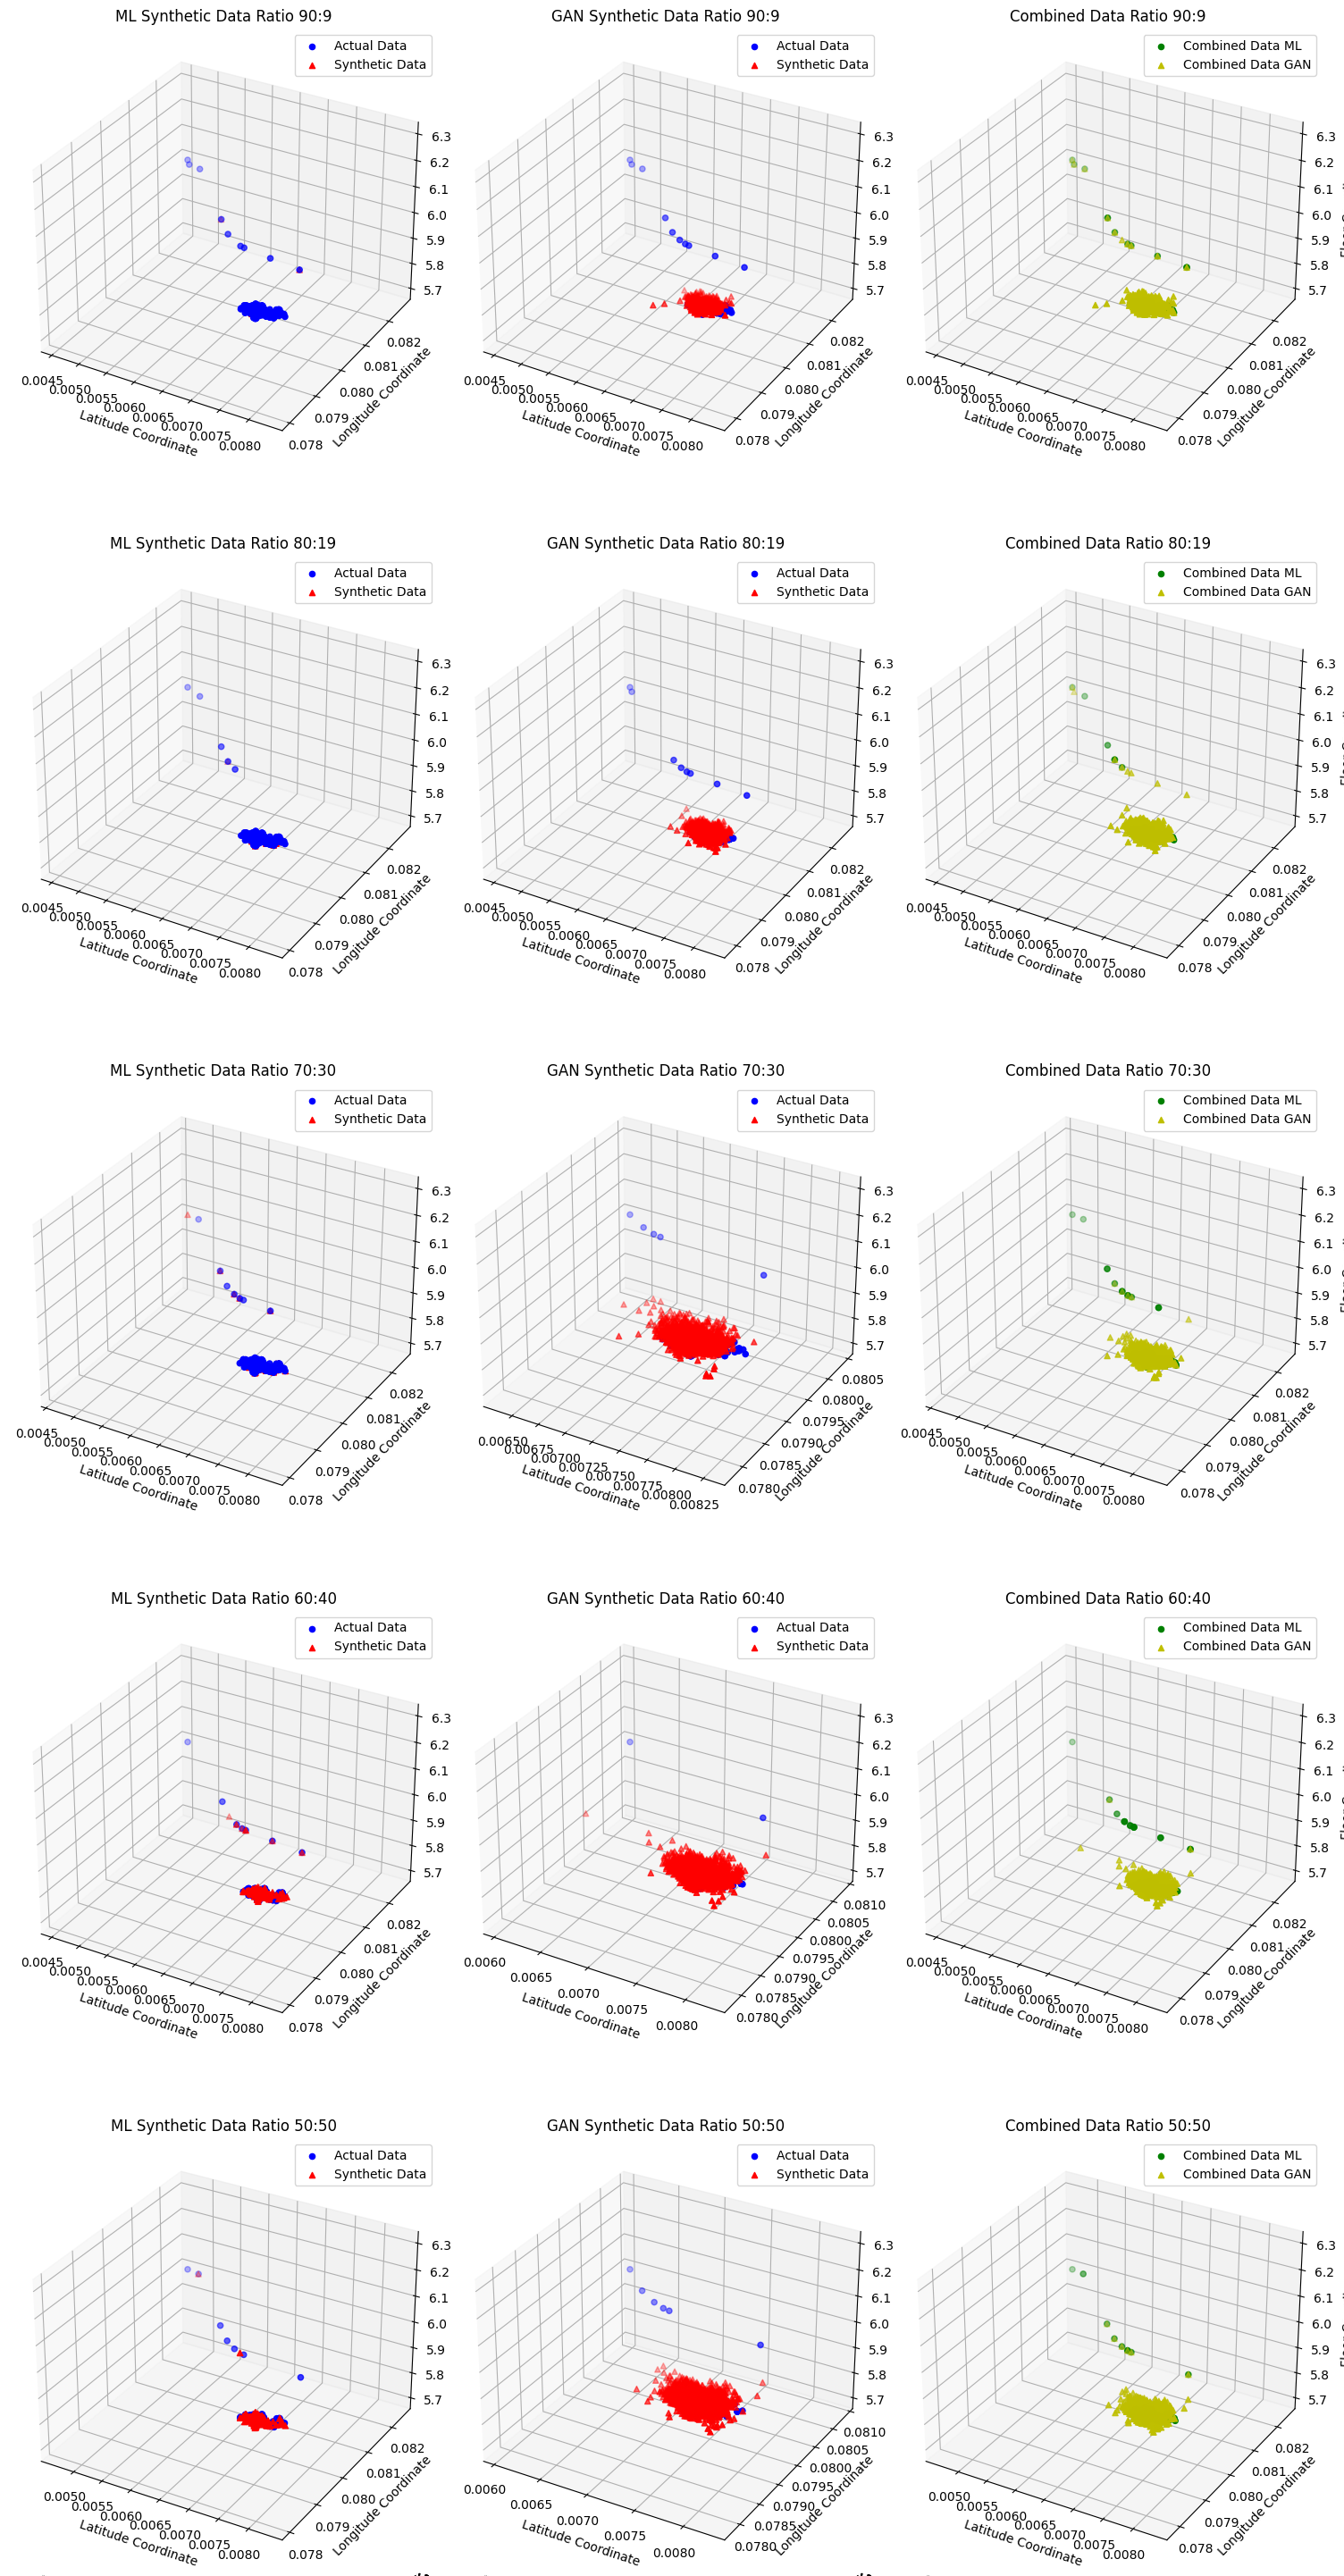

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load datasets
actual_data = pd.read_csv('Combined_data_2024_06_24.csv')
synthetic_data_ml = pd.read_csv('Ensemble_Noon_filter_synthetic_data.csv')
synthetic_data_gan = pd.read_csv('GANs_Noon_filtered_synthetic_samples.csv')

# Function to create dataset with given ratio for each floor
def create_combined_dataset(actual_data, synthetic_data, ratio):
    combined_data = pd.DataFrame()
    floors = actual_data['Floor'].unique()
    for floor in floors:
        actual_floor_data = actual_data[actual_data['Floor'] == floor]
        synthetic_floor_data = synthetic_data[synthetic_data['Floor'] == floor]
        
        n_actual = int(len(actual_floor_data) * ratio)
        n_synthetic = len(actual_floor_data) - n_actual
        
        actual_sample = actual_floor_data.sample(n_actual)
        synthetic_sample = synthetic_floor_data.sample(n_synthetic)
        
        actual_sample['type'] = 'actual'
        synthetic_sample['type'] = 'synthetic'
        
        combined_floor_data = pd.concat([actual_sample, synthetic_sample])
        combined_data = pd.concat([combined_data, combined_floor_data])
        
    return combined_data.reset_index(drop=True)

# Ratios to test
ratios = [0.9, 0.8, 0.7, 0.6, 0.5]

fig = plt.figure(figsize=(15, 30))

for i, ratio in enumerate(ratios):
    # Create combined dataset for ML synthetic data
    combined_data_ml = create_combined_dataset(actual_data, synthetic_data_ml, ratio)
    
    # Plotting for ML synthetic data
    ax = fig.add_subplot(len(ratios), 3, i*3+1, projection='3d')
    actual_points_ml = combined_data_ml[combined_data_ml['type'] == 'actual']
    synthetic_points_ml = combined_data_ml[combined_data_ml['type'] == 'synthetic']
    
    print(actual_points_ml.shape)
    print(synthetic_points_ml.shape)
    print(actual_points_ml.shape[0] + synthetic_points_ml.shape[0])
    
    ax.scatter(actual_points_ml['Latitude'], actual_points_ml['Longitude'], actual_points_ml['Floor'], c='b', marker='o', label='Actual Data')
    ax.scatter(synthetic_points_ml['Latitude'], synthetic_points_ml['Longitude'], synthetic_points_ml['Floor'], c='r', marker='^', label='Synthetic Data')
    ax.set_xlabel('Latitude Coordinate')
    ax.set_ylabel('Longitude Coordinate')
    ax.set_zlabel('Floor Coordinate')
    ax.set_title(f'ML Synthetic Data Ratio {int(ratio*100)}:{int((1-ratio)*100)}')
    ax.legend()

    # Create combined dataset for GAN synthetic data
    combined_data_gan = create_combined_dataset(actual_data, synthetic_data_gan, ratio)
    
    # Plotting for GAN synthetic data
    ax = fig.add_subplot(len(ratios), 3, i*3+2, projection='3d')
    actual_points_gan = combined_data_gan[combined_data_gan['type'] == 'actual']
    synthetic_points_gan = combined_data_gan[combined_data_gan['type'] == 'synthetic']
    
    ax.scatter(actual_points_gan['Latitude'], actual_points_gan['Longitude'], actual_points_gan['Floor'], c='b', marker='o', label='Actual Data')
    ax.scatter(synthetic_points_gan['Latitude'], synthetic_points_gan['Longitude'], synthetic_points_gan['Floor'], c='r', marker='^', label='Synthetic Data')
    ax.set_xlabel('Latitude Coordinate')
    ax.set_ylabel('Longitude Coordinate')
    ax.set_zlabel('Floor Coordinate')
    ax.set_title(f'GAN Synthetic Data Ratio {int(ratio*100)}:{int((1-ratio)*100)}')
    ax.legend()

    # Plotting for combined data
    ax = fig.add_subplot(len(ratios), 3, i*3+3, projection='3d')
    ax.scatter(combined_data_ml['Latitude'], combined_data_ml['Longitude'], combined_data_ml['Floor'], c='g', marker='o', label='Combined Data ML')
    ax.scatter(combined_data_gan['Latitude'], combined_data_gan['Longitude'], combined_data_gan['Floor'], c='y', marker='^', label='Combined Data GAN')
    ax.set_xlabel('Latitude Coordinate')
    ax.set_ylabel('Longitude Coordinate')
    ax.set_zlabel('Floor Coordinate')
    ax.set_title(f'Combined Data Ratio {int(ratio*100)}:{int((1-ratio)*100)}')
    ax.legend()

plt.tight_layout()
plt.show()
